# Human as a model

This is another way of baseline comparison where the psychologist is shown the same data as the model: post (ai) and two types of narcissism scores - the training dataset in total of 91 examples as the one below.

| post_ai        | adm     | riv |
|--------------|-----------|------------|
| AI is great for tasks involving a lot of data. Though it should not be trusted for anything important yet. | 2.667 | 3.556 |

And then has to assess the admiration and rivalry scores in the test dataset (44 examples) based on the posts. As shown below. 

| post_ai        | adm     | riv |
|--------------|-----------|------------|
| AI should not be an end all be all. |  | |

Then the comparison between the true and predicted results is conducted. 

The final results show that human psychologists perform worse than Few-shot method.

## Load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

import torch
from torch.nn import HuberLoss

In [18]:
path_to_human_assessed_A = '../data/responses/human_as_model_ai_A.csv'
path_to_human_assessed_B = '../data/responses/human_as_model_ai_B.csv'
path_to_human_assessed_C = '../data/responses/human_as_model_ai_B.csv' # TODO: change to C

path_to_test = '../data/split/human_test_ai.csv'

In [19]:
# load the human assessed data
human_data_A = pd.read_csv(path_to_human_assessed_A)
human_data_B = pd.read_csv(path_to_human_assessed_B)
human_data_C = pd.read_csv(path_to_human_assessed_C)
human_data_A.head()

,post_ai,adm,riv
0,AI in all its glory and abilities is often pit...,4.55,3.44
1,I'm getting tired of AI scraping art without p...,2.86,2.86
2,"AI can be scary, but used correctly it can be ...",2.86,3.11
3,AI can really help us when it comes to sifting...,1.33,1.00
4,AI is a useful tool in many applications in di...,3.44,2.55


In [20]:
# load the test data
test_data = pd.read_csv(path_to_test)
test_data[['post_ai','adm','riv']].head()

,post_ai,adm,riv
0,AI in all its glory and abilities is often pit...,4.778,2.111
1,I'm getting tired of AI scraping art without p...,2.333,1.889
2,"AI can be scary, but used correctly it can be ...",3.333,2.556
3,AI can really help us when it comes to sifting...,3.111,2.889
4,AI is a useful tool in many applications in di...,2.778,1.111


In [21]:
# drop not needed columns
test_data = test_data[['post_ai','adm','riv']]

In [22]:
# Merge the two dataframes
merged_data = test_data.merge(human_data_A, on='post_ai', suffixes=('', '_human_A')) \
                  .merge(human_data_B, on='post_ai', suffixes=('', '_human_B')) \
                  .merge(human_data_C, on='post_ai', suffixes=('', '_human_C'))
merged_data.rename(columns={'adm': 'adm_original', 'riv': 'riv_original'}, inplace=True)
# Check the length of the merged data
print(f"Merged correctly: {len(merged_data)==len(human_data_A)==len(human_data_B)==len(human_data_C)==len(test_data)}")
merged_data.head()

Merged correctly: True


,post_ai,adm_original,riv_original,adm_human_A,riv_human_A,adm_human_B,riv_human_B,adm_human_C,riv_human_C
0,AI in all its glory and abilities is often pit...,4.778,2.111,4.55,3.44,5.1,4.0,5.1,4.0
1,I'm getting tired of AI scraping art without p...,2.333,1.889,2.86,2.86,3.0,2.0,3.0,2.0
2,"AI can be scary, but used correctly it can be ...",3.333,2.556,2.86,3.11,3.0,3.3,3.0,3.3
3,AI can really help us when it comes to sifting...,3.111,2.889,1.33,1.00,1.8,1.5,1.8,1.5
4,AI is a useful tool in many applications in di...,2.778,1.111,3.44,2.55,2.8,2.3,2.8,2.3


# Mean squared error for the human assessed data

In [23]:
# Calculate the mean squared error
rmse_adm_A = root_mean_squared_error(merged_data['adm_human_A'], merged_data['adm_original'])
rmse_riv_A = root_mean_squared_error(merged_data['riv_human_A'], merged_data['riv_original'])
rmse_adm_B = root_mean_squared_error(merged_data['adm_human_B'], merged_data['adm_original'])
rmse_riv_B = root_mean_squared_error(merged_data['riv_human_B'], merged_data['riv_original'])
rmse_adm_C = root_mean_squared_error(merged_data['adm_human_C'], merged_data['adm_original'])
rmse_riv_C = root_mean_squared_error(merged_data['riv_human_C'], merged_data['riv_original'])
print(f"Root mean Squared Error for adm: A:{rmse_adm_A}, B:{rmse_adm_B}, C:{rmse_adm_C},\n\
       mean: {np.mean([rmse_adm_A,rmse_adm_B,rmse_adm_C])}")
print(f"Root mean Squared Error for riv: A:{rmse_riv_A}, B:{rmse_riv_B}, C:{rmse_riv_C},\n\
       mean: {np.mean([rmse_riv_A,rmse_riv_B,rmse_riv_C])}")

Root mean Squared Error for adm: A:1.4337607176424332, B:1.6215938497775464, C:1.6215938497775464,
       mean: 1.5589828057325086
Root mean Squared Error for riv: A:1.4892251188270547, B:1.5363234152884726, C:1.5363234152884726,
       mean: 1.5206239831346666


# Other metrics

In [24]:
# other metrics
# Calculate the mean absolute error
mae_adm_A = mean_absolute_error(merged_data['adm_human_A'], merged_data['adm_original'])
mae_riv_A = mean_absolute_error(merged_data['riv_human_A'], merged_data['riv_original'])
mae_adm_B = mean_absolute_error(merged_data['adm_human_B'], merged_data['adm_original'])
mae_riv_B = mean_absolute_error(merged_data['riv_human_B'], merged_data['riv_original'])
mae_adm_C = mean_absolute_error(merged_data['adm_human_C'], merged_data['adm_original'])
mae_riv_C = mean_absolute_error(merged_data['riv_human_C'], merged_data['riv_original'])

print(f"Mean Absolute Error for adm: A:{mae_adm_A}, B:{mae_adm_B}, C:{mae_adm_C},\n\
       mean: {np.mean([mae_adm_A,mae_adm_B,mae_adm_C])}")
print(f"Mean Absolute Error for riv: A:{mae_riv_A}, B:{mae_riv_B}, C:{mae_riv_C},\n\
       mean: {np.mean([mae_riv_A,mae_riv_B,mae_riv_C])}")

Mean Absolute Error for adm: A:1.1338863636363639, B:1.3184318181818184, C:1.3184318181818184,
       mean: 1.256916666666667
Mean Absolute Error for riv: A:1.1937727272727274, B:1.2967272727272727, C:1.2967272727272727,
       mean: 1.2624090909090908


In [25]:
# other metrics
# Calculate huber loss
huber_loss = HuberLoss()
huber_adm_A = huber_loss(torch.tensor(merged_data['adm_human_A']), torch.tensor(merged_data['adm_original']))
huber_adm_B = huber_loss(torch.tensor(merged_data['adm_human_B']), torch.tensor(merged_data['adm_original']))
huber_adm_C = huber_loss(torch.tensor(merged_data['adm_human_C']), torch.tensor(merged_data['adm_original']))
huber_riv_A = huber_loss(torch.tensor(merged_data['riv_human_A']), torch.tensor(merged_data['riv_original']))
huber_riv_B = huber_loss(torch.tensor(merged_data['riv_human_B']), torch.tensor(merged_data['riv_original']))
huber_riv_C = huber_loss(torch.tensor(merged_data['riv_human_C']), torch.tensor(merged_data['riv_original']))

print(f"Huber Loss for adm: A:{huber_adm_A}, B:{huber_adm_B}, C:{huber_adm_C}, \n\
       mean: {np.mean([huber_adm_A,huber_adm_B,huber_adm_C])}")
print(f"Huber Loss for riv: A:{huber_riv_A}, B:{huber_riv_B}, C:{huber_riv_C}, \n\
       mean: {np.mean([huber_riv_A,huber_riv_B,huber_riv_C])}")


Huber Loss for adm: A:0.7476142272727273, B:0.8983093409090909, C:0.8983093409090909, 
       mean: 0.8480776363636364
Huber Loss for riv: A:0.7875029886363637, B:0.8579166818181818, C:0.8579166818181818, 
       mean: 0.8344454507575758


In [26]:
def quantile_loss(y_true: torch.Tensor, y_pred: torch.Tensor, quantile=0.5):
    error = y_true - y_pred
    return torch.mean(torch.max(quantile * error, (quantile - 1) * error))

In [27]:
quan_adm_A = quantile_loss(torch.tensor(merged_data['adm_human_A']), torch.tensor(merged_data['adm_original']))
quan_adm_B = quantile_loss(torch.tensor(merged_data['adm_human_B']), torch.tensor(merged_data['adm_original']))
quan_adm_C = quantile_loss(torch.tensor(merged_data['adm_human_C']), torch.tensor(merged_data['adm_original']))
quan_riv_A = quantile_loss(torch.tensor(merged_data['riv_human_A']), torch.tensor(merged_data['riv_original']))
quan_riv_B = quantile_loss(torch.tensor(merged_data['riv_human_B']), torch.tensor(merged_data['riv_original']))
quan_riv_C = quantile_loss(torch.tensor(merged_data['riv_human_C']), torch.tensor(merged_data['riv_original']))

print(f"Quantile Loss for adm: A:{quan_adm_A}, B:{quan_adm_B}, C:{quan_adm_C}, \n\
       mean: {np.mean([quan_adm_A,quan_adm_B,quan_adm_C])}")
print(f"Quantile Loss for riv: A:{quan_riv_A}, B:{quan_riv_B}, C:{quan_riv_C}, \n\
       mean: {np.mean([quan_riv_A,quan_riv_B,quan_riv_C])}")

Quantile Loss for adm: A:0.5669431818181819, B:0.6592159090909091, C:0.6592159090909091, 
       mean: 0.6284583333333333
Quantile Loss for riv: A:0.5968863636363636, B:0.6483636363636364, C:0.6483636363636364, 
       mean: 0.6312045454545454


In [28]:
def maxae(y_true: np.ndarray, y_pred: np.ndarray):
    return np.max(np.abs(y_true - y_pred))

In [29]:
maxae_adm_A = maxae(merged_data['adm_human_A'], merged_data['adm_original'])
maxae_adm_B = maxae(merged_data['adm_human_B'], merged_data['adm_original'])
maxae_adm_C = maxae(merged_data['adm_human_C'], merged_data['adm_original'])
maxae_riv_A = maxae(merged_data['riv_human_A'], merged_data['riv_original'])
maxae_riv_B = maxae(merged_data['riv_human_B'], merged_data['riv_original'])
maxae_riv_C = maxae(merged_data['riv_human_C'], merged_data['riv_original'])

print(f"Max Absolute Error for adm: A:{maxae_adm_A}, B:{maxae_adm_B}, C:{maxae_adm_C},\n\
       mean: {np.mean([maxae_adm_A,maxae_adm_B,maxae_adm_C])}")
print(f"Max Absolute Error for riv: A:{maxae_riv_A}, B:{maxae_riv_B}, C:{maxae_riv_C},\n\
       mean: {np.mean([maxae_riv_A,maxae_riv_B,maxae_riv_C])}")

Max Absolute Error for adm: A:2.871, B:3.8890000000000002, C:3.8890000000000002,
       mean: 3.549666666666667
Max Absolute Error for riv: A:3.118, B:3.278, C:3.278,
       mean: 3.2246666666666663


### Distribution

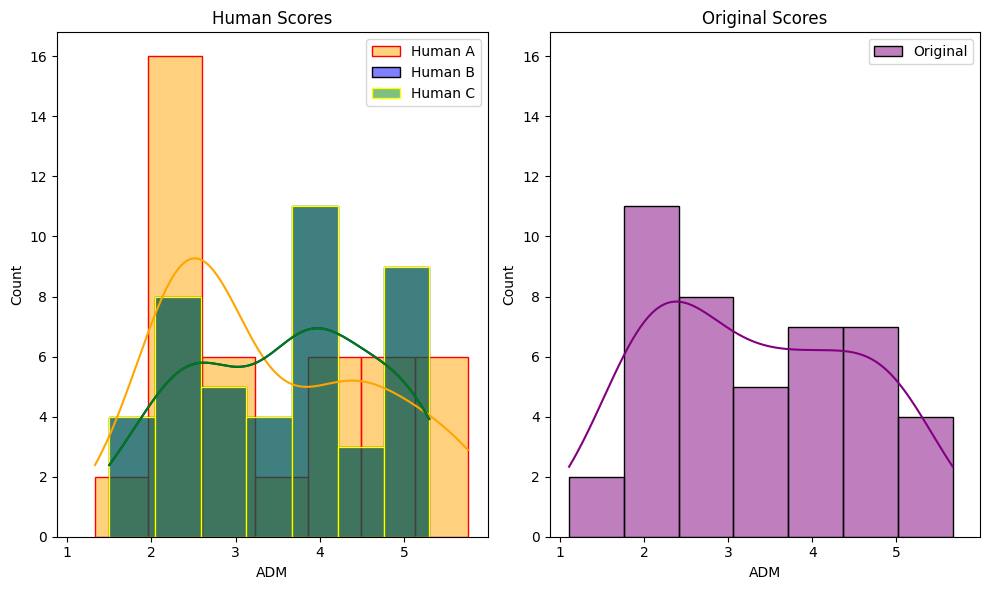

In [38]:
# Define variables for plotting
colors = ['orange', 'blue', 'green']
edgecolors = ['red', 'black', 'yellow']
labels = ['Human A', 'Human B', 'Human C']

# Plotting the histograms
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
for i, suffix in enumerate(['_human_A', '_human_B', '_human_C']):
    sns.histplot(merged_data[f'adm{suffix}'], color=colors[i], edgecolor=edgecolors[i], kde=True, label=labels[i])
plt.title('Human Scores')
plt.xlabel('ADM')
plt.legend()

# Plot for original data
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data['adm_original'], kde=True, color='purple', label='Original')
plt.title('Original Scores')
plt.xlabel('ADM')
plt.legend()

plt.tight_layout()
plt.show()

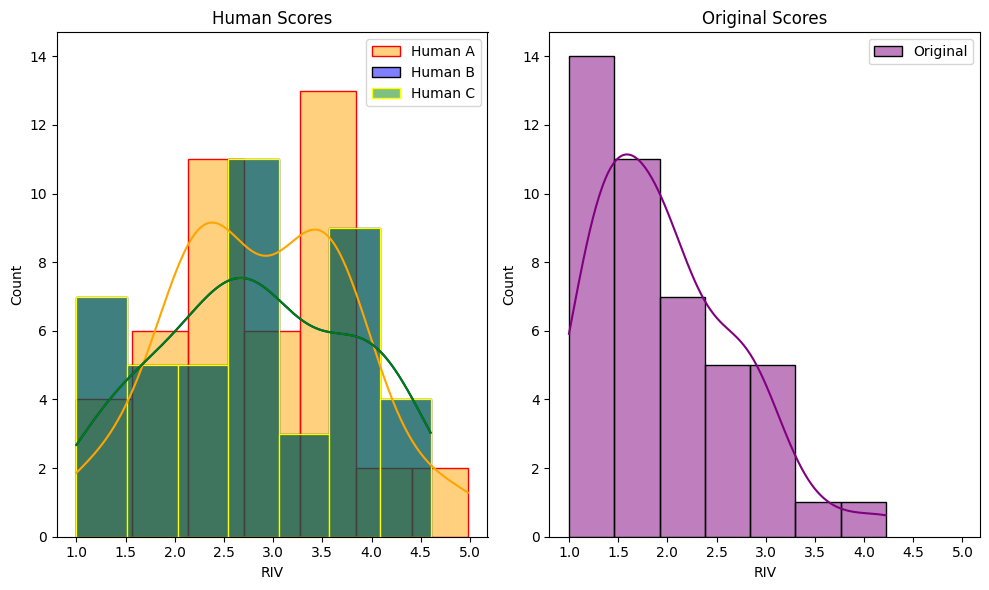

In [39]:
# Define variables for plotting
colors = ['orange', 'blue', 'green']
edgecolors = ['red', 'black', 'yellow']
labels = ['Human A', 'Human B', 'Human C']

# Plotting the histograms
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
for i, suffix in enumerate(['_human_A', '_human_B', '_human_C']):
    sns.histplot(merged_data[f'riv{suffix}'], color=colors[i], edgecolor=edgecolors[i], kde=True, label=labels[i])
plt.title('Human Scores')
plt.xlabel('RIV')
plt.legend()

# Plot for original data
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data['riv_original'], kde=True, color='purple', label='Original')
plt.title('Original Scores')
plt.xlabel('RIV')
plt.legend()

plt.tight_layout()
plt.show()

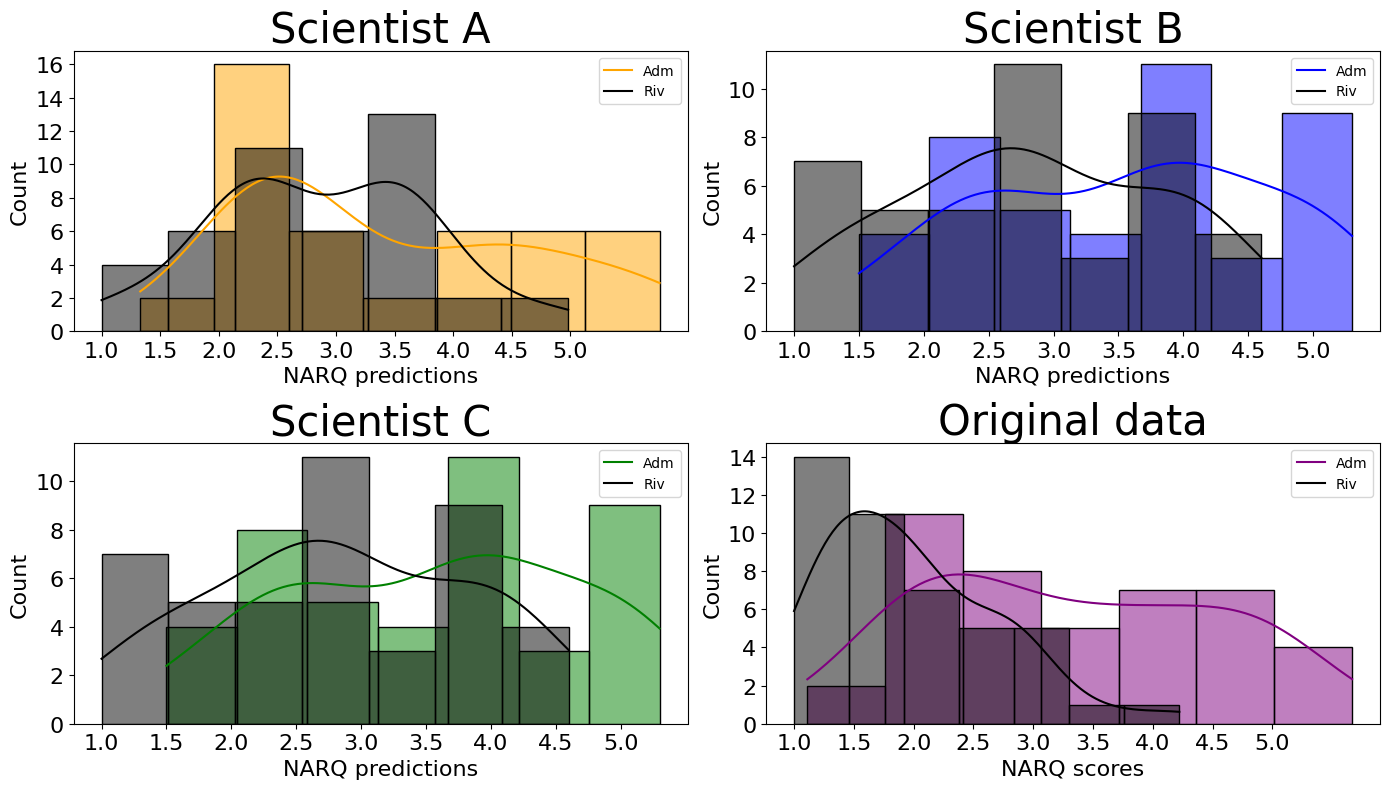

In [41]:
# Plotting histograms grouped together
plt.figure(figsize=(14, 8))

colors = ['orange', 'blue', 'green', 'purple']
labels = ['Scientist A', 'Scientist B', 'Scientist C', 'Original data']
columns = ['adm_human_A', 'adm_human_B', 'adm_human_C', 'adm_original']
columns_r = ['riv_human_A', 'riv_human_B', 'riv_human_C', 'riv_original']
xlabels = ['NARQ predictions','NARQ predictions','NARQ predictions','NARQ scores']
for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_data[column], color=colors[i], kde=True)
    sns.histplot(merged_data[columns_r[i]], color='black', kde=True)

    plt.title(labels[i],fontsize=30)
    plt.xlabel(xlabels[i], fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(np.arange(1.0, 5.5, 0.5),fontsize=16)
    plt.legend(["Adm","Riv"])



plt.tight_layout()
plt.show()